In [ ]:
!pip install jsonlines

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import jsonlines
phase=[]
table_id=[]
question=[]
sql=[]
with jsonlines.open("/content/drive/My Drive/RoBERTa NL2SQL/train.jsonl") as f:
  for line in f.iter():
    phase.append(line['phase'])
    table_id.append(line['table_id'])
    question.append(line['question'])
    sql.append(line['sql'])
import pandas as pd
d={'phase':phase,'table_id':table_id,'question':question,'sql':sql}
train_data=pd.DataFrame(d)
train_data
f.close()


train_data.columns=['phase','id','question','sql']


import jsonlines
id=[]
header=[]
types=[]
rows=[]
with jsonlines.open("/content/drive/My Drive/RoBERTa NL2SQL/train.tables.jsonl") as f:
  for line in f.iter():
    id.append((line['id']))
    header.append((line['header']))
    types.append((line['types']))
    rows.append(line['rows'])
d={'id':id,'header':header,'types':types,'rows':rows}
train_table_info=pd.DataFrame(d)
train_table_info



,id,header,types,rows
0,1-1000181-1,"[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
1,1-10006830-1,"[Aircraft, Description, Max Gross Weight, Tota...","[text, text, text, text, text]","[[Robinson R-22, Light utility helicopter, 1,3..."
2,1-10007452-3,"[Order Year, Manufacturer, Model, Fleet Series...","[text, text, text, text, text, text]","[[1992-93, Gillig, Phantom (High Floor), 444-4..."
3,1-10015132-1,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Quincy Acy, 4, United States, Forward, 2012-..."
4,1-10015132-14,"[Player, No., Nationality, Position, Years in ...","[text, real, text, text, text, text]","[[Patrick O'Bryant, 13, United States, Center,..."
...,...,...,...,...
18580,2-18998832-2,"[Game, Date, Opponent, Venue, Result, Attendance]","[real, text, text, text, text, real]","[[1, 15 August 1987, Swindon Town, Home, 2–0, ..."
18581,2-18998832-5,"[Round (Leg), Date, Opponent, Venue, Result, A...","[text, text, text, text, text, real]","[[2 (1), 22 September 1987, Fulham, Away, 5–1,..."
18582,2-19001175-1,"[Country, Seasons, Championship Titles, Race e...","[text, text, text, text, real, real, real, rea...","[[United Kingdom, 1986, 0, 1, 0, 0, 0, 0, 0], ..."
18583,2-19008019-32,"[!Event, Round, Surface, Winner, Opponent, Res...","[real, text, text, text, text, text]","[[1., Wimbledon, Final, Grass, Roger Federer, ..."


In [ ]:
merged_data=train_data.merge(train_table_info,on='id')
merged_data

,phase,id,question,sql,header,types,rows
0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya..."
4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}","[Order Year, Manufacturer, Model, Fleet Series...","[text, text, text, text, text, text]","[[1992-93, Gillig, Phantom (High Floor), 444-4..."
...,...,...,...,...,...,...,...
56350,2,2-12200756-16,What time was the match played with a score of...,"{'sel': 1, 'conds': [[5, 0, '3-2']], 'agg': 0}","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi..."
56351,2,2-12200756-16,On which ground did the team play Aston Villa?,"{'sel': 4, 'conds': [[3, 0, 'aston villa']], '...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi..."
56352,2,2-12200756-16,What kind of competition was it at San Siro at...,"{'sel': 2, 'conds': [[4, 0, 'san siro'], [1, 0...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi..."
56353,2,2-12214488-1,What is the total number of decile for the red...,"{'sel': 5, 'conds': [[0, 0, 'redwood school']]...","[Name, Years, Gender, Locality, Authority, Dec...","[text, text, text, text, text, real]","[[Amesbury School, 1–6, Coed, Churton Park, St..."


In [ ]:
from tqdm import tqdm
sql_in_text=[]
aggregate=['','MAX','MIN','COUNT','SUM','AVG']
operator=['=','<','>']
word_operator=['eq','lt','gt']

for i in tqdm(range(len(merged_data))):
  sql=merged_data.sql.iloc[i]
  col=merged_data.header.iloc[i][sql['sel']]
  agg=aggregate[sql['agg']]
  cond_col=[]
  cond_opr=[]
  cond_value=[]
  for j in sql['conds']:
    cond_col.append(merged_data.header.iloc[i][j[0]])
    cond_opr.append(word_operator[j[1]])
    cond_value.append(j[2])
  resulted_sql="select "
  if(agg==''):
    resulted_sql+=col+" where "
  else:
    resulted_sql+=agg+"("+col+") where "

  for j in range(len(cond_col)):
    if(j!=0):
      resulted_sql+="and "
    resulted_sql+=cond_col[j]+' '+cond_opr[j]+' '
    resulted_sql+=str(cond_value[j])+' '

  sql_in_text.append(resulted_sql)





merged_data['resulted_sql']=sql_in_text


merged_data



100%|██████████| 56355/56355 [00:04<00:00, 13499.57it/s]


,phase,id,question,sql,header,types,rows,resulted_sql
0,1,1-1000181-1,Tell me what the notes are for South Australia,"{'sel': 5, 'conds': [[3, 0, 'SOUTH AUSTRALIA']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Notes where Current slogan eq SOUTH AUS...
1,1,1-1000181-1,What is the current series where the new serie...,"{'sel': 4, 'conds': [[5, 0, 'New series began ...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Current series where Notes eq New serie...
2,1,1-1000181-1,What is the format for South Australia?,"{'sel': 2, 'conds': [[0, 0, 'South Australia']...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Format where State/territory eq South A...
3,1,1-1000181-1,Name the background colour for the Australian ...,"{'sel': 1, 'conds': [[0, 0, 'Australian Capita...","[State/territory, Text/background colour, Form...","[text, text, text, text, text, text]","[[Australian Capital Territory, blue/white, Ya...",select Text/background colour where State/terr...
4,1,1-10007452-3,how many times is the fuel propulsion is cng?,"{'sel': 3, 'conds': [[5, 0, 'CNG']], 'agg': 3}","[Order Year, Manufacturer, Model, Fleet Series...","[text, text, text, text, text, text]","[[1992-93, Gillig, Phantom (High Floor), 444-4...",select COUNT(Fleet Series (Quantity)) where Fu...
...,...,...,...,...,...,...,...,...
56350,2,2-12200756-16,What time was the match played with a score of...,"{'sel': 1, 'conds': [[5, 0, '3-2']], 'agg': 0}","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi...",select Time where Score eq 3-2
56351,2,2-12200756-16,On which ground did the team play Aston Villa?,"{'sel': 4, 'conds': [[3, 0, 'aston villa']], '...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi...",select Ground where Opponent eq aston villa
56352,2,2-12200756-16,What kind of competition was it at San Siro at...,"{'sel': 2, 'conds': [[4, 0, 'san siro'], [1, 0...","[Date, Time, Competition, Opponent, Ground, Sc...","[text, text, text, text, text, text]","[[17 July 2007, 15:30 GMT, Friendly Match, Chi...",select Competition where Ground eq san siro an...
56353,2,2-12214488-1,What is the total number of decile for the red...,"{'sel': 5, 'conds': [[0, 0, 'redwood school']]...","[Name, Years, Gender, Locality, Authority, Dec...","[text, text, text, text, text, real]","[[Amesbury School, 1–6, Coed, Churton Park, St...",select COUNT(Decile) where Name eq redwood sch...


In [ ]:
paraquestion=merged_data['question']
SQL=merged_data['resulted_sql']
Header=merged_data['header']
otr=pd.DataFrame()
otr['paraquestion']=paraquestion
otr['SQL']=SQL
otr['Header']=Header
otr

,paraquestion,SQL,Header
0,Tell me what the notes are for South Australia,select Notes where Current slogan eq SOUTH AUS...,"[State/territory, Text/background colour, Form..."
1,What is the current series where the new serie...,select Current series where Notes eq New serie...,"[State/territory, Text/background colour, Form..."
2,What is the format for South Australia?,select Format where State/territory eq South A...,"[State/territory, Text/background colour, Form..."
3,Name the background colour for the Australian ...,select Text/background colour where State/terr...,"[State/territory, Text/background colour, Form..."
4,how many times is the fuel propulsion is cng?,select COUNT(Fleet Series (Quantity)) where Fu...,"[Order Year, Manufacturer, Model, Fleet Series..."
...,...,...,...
56350,What time was the match played with a score of...,select Time where Score eq 3-2,"[Date, Time, Competition, Opponent, Ground, Sc..."
56351,On which ground did the team play Aston Villa?,select Ground where Opponent eq aston villa,"[Date, Time, Competition, Opponent, Ground, Sc..."
56352,What kind of competition was it at San Siro at...,select Competition where Ground eq san siro an...,"[Date, Time, Competition, Opponent, Ground, Sc..."
56353,What is the total number of decile for the red...,select COUNT(Decile) where Name eq redwood sch...,"[Name, Years, Gender, Locality, Authority, Dec..."


**paraphrase**

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained("Vamsi/T5_Paraphrase_Paws")
# model = AutoModelForSeq2SeqLM.from_pretrained("Vamsi/T5_Paraphrase_Paws")

In [ ]:
# merged_ptrain_data=pd.DataFrame()

In [ ]:
# rs=[]
# h=[]
# for i in range(5000):
#   #s = "Provide me with the names of all the villages (German) that has 76.3% of Slovenes in 1951."
#   s=merged_data['question'][i]
#   #e=[s]
#   x=get_paraphrased_sentences(model, tokenizer, "paraphrase: " + s)
#   #y=list(set(x))
#   # pq.extend(e+y)
#   for u in x:
#       #print(i)
#       if u!=s and u not in pq:
#         #print(len(i),len(s))
#         pq.append(u)
#         rs.append(merged_data['resulted_sql'][i])
#         h.append(merged_data['header'][i])
# merged_ptrain_data['paraquestion']=pq
# merged_ptrain_data['SQL']=rs
# merged_ptrain_data['Header']=h

In [ ]:
#merged_ptrain_data

In [ ]:
#merged_ptrain_data['paraquestion'][1]

In [ ]:
# print("question: ",merged_data.question.iloc[100])
# print("headers: ",merged_data.header.iloc[100])
# print("sql: ",merged_data.resulted_sql.iloc[100])

In [ ]:
# merged_data=pd.DataFrame()
# merged_data['question']=para_enlines
# merged_data['sql']=para_sqllines
# merged_data['header']=headers
# merged_data

In [ ]:
import pandas as pd
df1=pd.read_csv('/content/tr0-5000.csv')
df2=pd.read_csv('/content/tr5000-10000.csv')
df3=pd.read_csv('/content/tr10000-20000.csv')
df4=pd.read_csv('/content/tr20000-300000.csv')
df5=pd.read_csv('/content/tr30000-40000.csv')
df6=pd.read_csv('/content/tr40000-56000.csv')
merged_df = pd.concat([df1, df2, df3,df4,df5,df6])

# Reset the index of the merged dataframe
merged_paratr_df = merged_df.reset_index(drop=True)

In [ ]:
merged_paratr_df

,paraquestion,SQL,Header
0,Tell me what the notes are for South Australia.,select Notes where Current slogan eq SOUTH AUS...,"['State/territory', 'Text/background colour', ..."
1,Tell me what the notes for South Australia are.,select Notes where Current slogan eq SOUTH AUS...,"['State/territory', 'Text/background colour', ..."
2,Tell me what notes are for South Australia.,select Notes where Current slogan eq SOUTH AUS...,"['State/territory', 'Text/background colour', ..."
3,What is the current series where the new serie...,select Current series where Notes eq New serie...,"['State/territory', 'Text/background colour', ..."
4,What is the format of South Australia?,select Format where State/territory eq South A...,"['State/territory', 'Text/background colour', ..."
...,...,...,...
96891,What kind of competition was it in San Siro at...,select Competition where Ground eq san siro an...,"['Date', 'Time', 'Competition', 'Opponent', 'G..."
96892,What is the total number of deciles for the re...,select COUNT(Decile) where Name eq redwood sch...,"['Name', 'Years', 'Gender', 'Locality', 'Autho..."
96893,What is the total decile number for the redwoo...,select COUNT(Decile) where Name eq redwood sch...,"['Name', 'Years', 'Gender', 'Locality', 'Autho..."
96894,What is the total decile for the redwood schoo...,select COUNT(Decile) where Name eq redwood sch...,"['Name', 'Years', 'Gender', 'Locality', 'Autho..."


In [ ]:
merged_paratr_df.isnull().sum()

paraquestion    0
SQL             0
Header          0
dtype: int64

In [ ]:
question_header=[]

#add original train data to question_header
for i in range(len(otr)):
  question=otr.paraquestion.iloc[i]
  header=otr.Header.iloc[i]
  for head in header:
    question+=' '+head
  question_header.append(question)


for i in range(len(merged_paratr_df)):
  question=merged_paratr_df.paraquestion.iloc[i]
  header=merged_paratr_df.Header.iloc[i]

  b=header[1:-1]
  #print(b)
  a=b.split(',')
  a = b.replace(", ", ",")
  a = a.replace("'", "")
  #print(a.split(','))
  #for i in range(len(a)):
  #  a[i]=a[i].replace('[','')
  #  a[i]=a[i].replace("'",'')
  #  a[i]=a[i].replace(',','')
  #  a[i]=a[i].replace(']','')
  for i in a.split(','):

    question+=' '+i

  question_header.append(question)





In [ ]:
question_header[1:10]

['What is the current series where the new series began in June 2011? State/territory Text/background colour Format Current slogan Current series Notes',
 'What is the format for South Australia? State/territory Text/background colour Format Current slogan Current series Notes',
 'Name the background colour for the Australian Capital Territory State/territory Text/background colour Format Current slogan Current series Notes',
 'how many times is the fuel propulsion is cng? Order Year Manufacturer Model Fleet Series (Quantity) Powertrain (Engine/Transmission) Fuel Propulsion',
 'what is the fuel propulsion where the fleet series (quantity) is 310-329 (20)? Order Year Manufacturer Model Fleet Series (Quantity) Powertrain (Engine/Transmission) Fuel Propulsion',
 'who is the manufacturer for the order year 1998? Order Year Manufacturer Model Fleet Series (Quantity) Powertrain (Engine/Transmission) Fuel Propulsion',
 'how many times is the model ge40lfr? Order Year Manufacturer Model Fleet 

In [ ]:
len(question_header)

153251

In [ ]:

def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    text = text.lower()
    text=text.strip()
    text = decontractions(text)
    return text


import re
preprocess_question_header=[]
for i in question_header:
  preprocess_question_header.append(preprocess(i))

#add preprocessed original data sql
preprocess_sql_in_text=[]
for i in otr['SQL'].values:
  preprocess_sql_in_text.append(preprocess(i))


for i in merged_paratr_df['SQL'].values:
  preprocess_sql_in_text.append(preprocess(i))


preprocess_sql_in_text[100]



'select tv season where rank eq 39'

In [ ]:
final_data=pd.DataFrame()
final_data['question_header']=question_header[:50000]+question_header[50000:60000]
final_data['sql']=preprocess_sql_in_text[:50000]+preprocess_sql_in_text[50000:60000]
#final_data=pd.concat([final_data[:50000],final_data[50005:60000]])
final_data

,question_header,sql
0,Tell me what the notes are for South Australia...,select notes where current slogan eq south aus...
1,What is the current series where the new serie...,select current series where notes eq new serie...
2,What is the format for South Australia? State/...,select format where state/territory eq south a...
3,Name the background colour for the Australian ...,select text/background colour where state/terr...
4,how many times is the fuel propulsion is cng? ...,select count(fleet series (quantity)) where fu...
...,...,...
59995,Name the total number of scoring averages for ...,select count(scoring average) where money list...
59996,What is the county where Kerry# is 59740? Coun...,select county where kerry# eq 59740
59997,Kerry# is in Cook County? County Kerry% Kerry#...,select kerry# where county eq cook
59998,Kerry is in Cook County? County Kerry% Kerry# ...,select kerry# where county eq cook


In [ ]:
final_data

,question_header,sql
0,Tell me what the notes are for South Australia...,select notes where current slogan eq south aus...
1,What is the current series where the new serie...,select current series where notes eq new serie...
2,What is the format for South Australia? State/...,select format where state/territory eq south a...
3,Name the background colour for the Australian ...,select text/background colour where state/terr...
4,how many times is the fuel propulsion is cng? ...,select count(fleet series (quantity)) where fu...
...,...,...
59995,Name the total number of scoring averages for ...,select count(scoring average) where money list...
59996,What is the county where Kerry# is 59740? Coun...,select county where kerry# eq 59740
59997,Kerry# is in Cook County? County Kerry% Kerry#...,select kerry# where county eq cook
59998,Kerry is in Cook County? County Kerry% Kerry# ...,select kerry# where county eq cook


In [ ]:
final_data.question_header.iloc[4]


'how many times is the fuel propulsion is cng? Order Year Manufacturer Model Fleet Series (Quantity) Powertrain (Engine/Transmission) Fuel Propulsion'

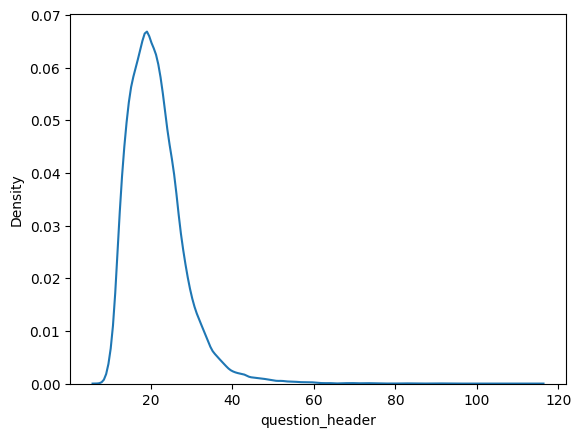

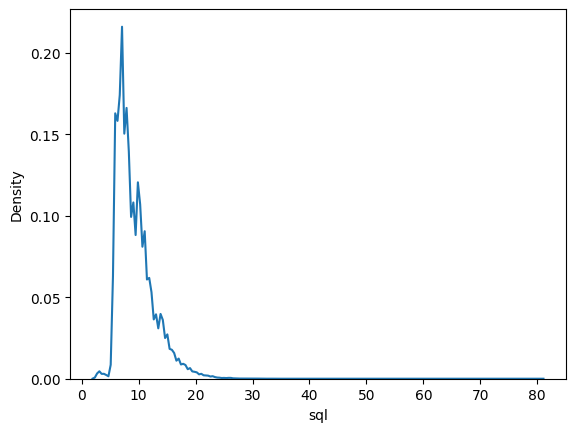

In [ ]:
import matplotlib.pyplot as plt

que_lengths = final_data['question_header'].str.split().apply(len)
sql_lengths = final_data['sql'].str.split().apply(len)
import seaborn as sns
sns.kdeplot(que_lengths)
plt.show()
sns.kdeplot(sql_lengths)
plt.show()

In [ ]:
input_lengths=final_data['question_header'].str.split().apply(len)
output_lengths=final_data['sql'].str.split().apply(len)


ci=0
for i in input_lengths:
  if(i>60):
    ci+=1
co=0
for i in output_lengths:
  if(i>30):
    co+=1
print("Number of words in input greater than 30:",ci)
print("Number of words in output greater than 20:",co)



Number of words in input greater than 30: 91
Number of words in output greater than 20: 18


In [ ]:
pos=[]
for i in range(len(input_lengths)):
  if(input_lengths[i]<=60 and output_lengths[i]<=30):
    pos.append(i)



data=final_data.iloc[pos]


data['sql_input'] = '<start> ' + data['sql'].astype(str)
data['sql_output'] = data['sql'].astype(str) + ' <end>'



<ipython-input-32-db2f927548e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_input'] = '<start> ' + data['sql'].astype(str)
<ipython-input-32-db2f927548e5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_output'] = data['sql'].astype(str) + ' <end>'


In [ ]:
data

,question_header,sql,sql_input,sql_output
0,Tell me what the notes are for South Australia...,select notes where current slogan eq south aus...,<start> select notes where current slogan eq s...,select notes where current slogan eq south aus...
1,What is the current series where the new serie...,select current series where notes eq new serie...,<start> select current series where notes eq n...,select current series where notes eq new serie...
2,What is the format for South Australia? State/...,select format where state/territory eq south a...,<start> select format where state/territory eq...,select format where state/territory eq south a...
3,Name the background colour for the Australian ...,select text/background colour where state/terr...,<start> select text/background colour where st...,select text/background colour where state/terr...
4,how many times is the fuel propulsion is cng? ...,select count(fleet series (quantity)) where fu...,<start> select count(fleet series (quantity)) ...,select count(fleet series (quantity)) where fu...
...,...,...,...,...
59995,Name the total number of scoring averages for ...,select count(scoring average) where money list...,<start> select count(scoring average) where mo...,select count(scoring average) where money list...
59996,What is the county where Kerry# is 59740? Coun...,select county where kerry# eq 59740,<start> select county where kerry# eq 59740,select county where kerry# eq 59740 <end>
59997,Kerry# is in Cook County? County Kerry% Kerry#...,select kerry# where county eq cook,<start> select kerry# where county eq cook,select kerry# where county eq cook <end>
59998,Kerry is in Cook County? County Kerry% Kerry# ...,select kerry# where county eq cook,<start> select kerry# where county eq cook,select kerry# where county eq cook <end>


In [ ]:
data.sql_output.iloc[2]

'select format where state/territory eq south australia <end>'

In [ ]:
data.sql_input.iloc[0]= str(data.sql_input.iloc[0])+' <end>'
data.sql_input.iloc[0]

<ipython-input-35-065f8f812f39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sql_input.iloc[0]= str(data.sql_input.iloc[0])+' <end>'


'<start> select notes where current slogan eq south australia <end>'

In [ ]:
data.sql_input.iloc[5]

'<start> select fuel propulsion where fleet series (quantity) eq 310-329 (20)'

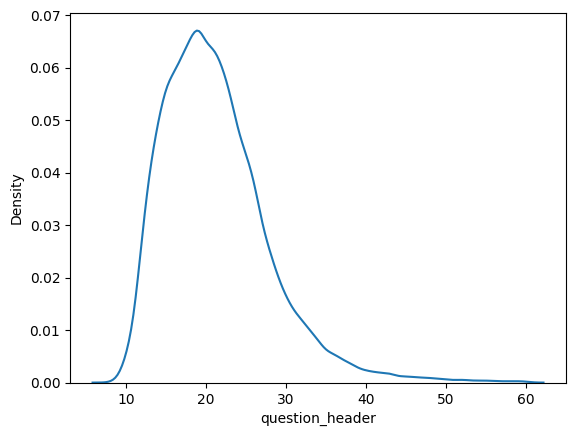

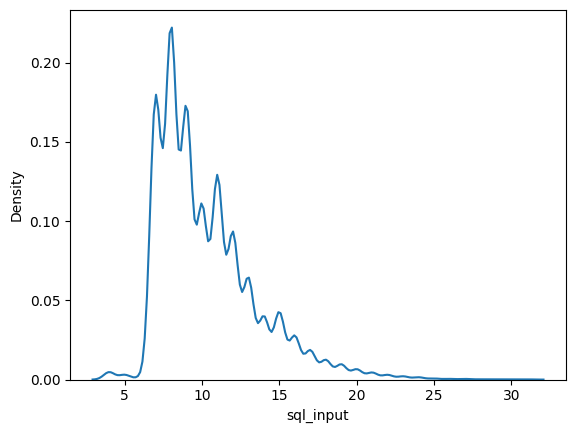

In [ ]:
import matplotlib.pyplot as plt

que_lengths = data['question_header'].str.split().apply(len)
sql_lengths = data['sql_input'].str.split().apply(len)
import seaborn as sns
sns.kdeplot(que_lengths)
plt.show()
sns.kdeplot(sql_lengths)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tknizer_question = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n')
tknizer_question.fit_on_texts(data['question_header'].values)
tknizer_sql = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n')
tknizer_sql.fit_on_texts(data['sql_input'].values)

print(tknizer_question.word_index,tknizer_sql.word_index)
vocab_size_question=len(tknizer_question.word_index.keys())
print(vocab_size_question)
vocab_size_sql=len(tknizer_sql.word_index.keys())
print(vocab_size_sql)



{'the': 1, 'of': 2, 'what': 3, 'is': 4, 'team': 5, 'date': 6, 'score': 7, 'a': 8, 'for': 9, 'in': 10, 'was': 11, 'and': 12, 'name': 13, 'when': 14, 'than': 15, 'year': 16, 'points': 17, 'with': 18, 'home': 19, 'has': 20, 'player': 21, 'position': 22, 'which': 23, 'total': 24, 'number': 25, 'record': 26, 'away': 27, 'opponent': 28, 'result': 29, 'rank': 30, 'attendance': 31, 'game': 32, 'location': 33, '1': 34, 'by': 35, 'no': 36, 'how': 37, 's': 38, 'venue': 39, 'who': 40, 'season': 41, 'country': 42, 'time': 43, 'title': 44, '2': 45, 'many': 46, 'high': 47, 'round': 48, 'that': 49, 'club': 50, 'on': 51, 'to': 52, 'played': 53, 'series': 54, 'against': 55, '3': 56, 'week': 57, 'goals': 58, 'original': 59, 'episode': 60, 'had': 61, 'average': 62, 'place': 63, 'tournament': 64, 'less': 65, 'wins': 66, 'school': 67, '4': 68, '5': 69, 'at': 70, 'crowd': 71, 'air': 72, 'did': 73, 'as': 74, 'first': 75, 'pick': 76, 'class': 77, 'winner': 78, 'college': 79, 'population': 80, 'type': 81, '0': 

In [ ]:
import pickle
with open('tokenizer_question.pickle', 'wb') as handle:
  pickle. dump(tknizer_question, handle, protocol=pickle. HIGHEST_PROTOCOL)
with open('tokenizer_sql.pickle', 'wb') as handle:
  pickle. dump(tknizer_sql, handle, protocol=pickle. HIGHEST_PROTOCOL)


import pickle
with open('tokenizer_question.pickle', 'rb') as handle:
  tknizer_question=pickle.load(handle)
with open('tokenizer_sql.pickle', 'rb') as handle:
  tknizer_sql=pickle.load(handle)



In [ ]:
!wget https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.100d.txt

--2023-07-24 11:43:25--  https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.100d.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ddkmtqz01jc024u/glove.6B.100d.txt [following]
--2023-07-24 11:43:25--  https://www.dropbox.com/s/raw/ddkmtqz01jc024u/glove.6B.100d.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7fc14dd0a9d8a5d60fe112c94f.dl.dropboxusercontent.com/cd/0/inline/CAcmg2D5h594yGxteEHm3CmAg-ja1HuUrXE66bn02Zew3zHpnP9-3ifVEXomElfWX3-eTcn9sEry7yMaR4LihDRfgSjytFa9iIvxSOrB_5NkSXUsIsQnKWzcjMxiATyQ_Ad7zKiJRMEui5rwGc36tsx4XXRQlsSq_JrSoQbM4KYFxQ/file# [following]
--2023-07-24 11:43:26--  https://uc7fc14dd0a9d8a5d60fe112c94f.dl.dropboxusercontent.com/cd/0/inline/CAcmg2D5h594yGxteEHm3CmAg-ja1HuUrXE66bn02Zew3zHpnP9-3ifVEXomEl

In [ ]:
import numpy as np
from tqdm import tqdm
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_size_sql+1,100))  #to convert each unique word in tokenzier's vocab  ==>100-d vector
for word, i in tqdm(tknizer_sql.word_index.items()):
    embedding_vector= embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)


400000it [00:14, 28238.70it/s]
100%|██████████| 29731/29731 [00:00<00:00, 447002.92it/s]

(29732, 100)


In [ ]:
embedding_matrix.shape

(29732, 100)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
class Dataset:
    def __init__(self, data, tknizer_question, tknizer_sql, max_len):
        self.encoder_inps = data.question_header.values
        self.decoder_inps = data.sql_input.values
        self.decoder_outs = data.sql_output.values
        self.tknizer_question = tknizer_question
        self.tknizer_sql = tknizer_sql
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_question.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_sql.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_sql.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=31, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=31, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)


class Dataloder(tf.keras.utils.Sequence):
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)



# max_length=61
# train_dataset = Dataset(data, tknizer_question, tknizer_sql, 61)
# train_dataloader = Dataloder(train_dataset, batch_size=128)
# print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)


In [ ]:
train_dataset = Dataset(data, tknizer_question, tknizer_sql, 61)
train_dataloader = Dataloder(train_dataset, batch_size=128)
print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(128, 61) (128, 31) (128, 31)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Softmax
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self, vocab_size, embedding_dim, enc_units,input_length):
      super().__init__()
      self.vocab_size = vocab_size
      self.embedding_dim = embedding_dim
      self.input_length = input_length
      self.enc_units= enc_units


    def build(self, input_shape):  #emb and lstm layers def
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,mask_zero=True ,name="embedding_layer_encoder")
        self.lstm = LSTM(self.enc_units, return_state=True, return_sequences=True, name="Encoder_LSTM")

    def call(self,input_sequence,init_states,training=True):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedd= self.embedding(input_sequence)
        self.lstm_output, self.lstm_state_h,self.lstm_state_c = self.lstm(input_embedd,initial_state=init_states)
        return self.lstm_output, self.lstm_state_h,self.lstm_state_c



    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      state_h=tf.zeros((batch_size,self.enc_units))
      state_c=tf.zeros((batch_size,self.enc_units))
      return state_h, state_c
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self, vocab_size, embedding_dim, dec_units,input_length):
        super().__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = 100
        self.dec_units = dec_units
        self.input_length = input_length
        # we are using embedding_matrix and not training the embedding layer
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_decoder",trainable=False)
        self.lstm = LSTM(self.dec_units, return_sequences=True, return_state=True, name="Encoder_LSTM")



    def call(self,input_sequence,initial_states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm

          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        target_embedd = self.embedding(input_sequence)
        lstm_output, lstm_h_state,lstm_c_state  = self.lstm(target_embedd, initial_states)
        return lstm_output,lstm_h_state,lstm_c_state
class Encoder_decoder(Model):
    def __init__(self, encoder_inputs_length,decoder_inputs_length, output_vocab_size,batch_size):
        super().__init__() # https://stackoverflow.com/a/27134600/4084039
        self.encoder = Encoder(vocab_size=vocab_size_question+1, embedding_dim=200, enc_units=500,input_length=encoder_inputs_length)
        self.init_states=self.encoder.initialize_states(batch_size=batch_size)
        self.decoder = Decoder(vocab_size=vocab_size_sql+1, embedding_dim=300, dec_units=500,input_length=decoder_inputs_length)
        self.dense   = Dense(output_vocab_size, activation='softmax',name="Dense_Layer")


    def call(self, data):
        input,output = data[0], data[1]
        encoder_output, encoder_h, encoder_c = self.encoder(input,self.init_states)
        #print(type(input),type(self.init_states))
        #print("input",input.shape,"init_states",self.init_states.shape)
        #print("encoder_output",encoder_output.shape,"encoder_h", encoder_h.shape,"encoder_c", encoder_c.shape)
        decoder_output,_,_= self.decoder(output,[encoder_h, encoder_c])
        output = self.dense(decoder_output)

        return output

In [ ]:
#Loading Json val Data
import jsonlines
phase=[]
table_id=[]
question=[]
sql=[]
with jsonlines.open("/content/drive/My Drive/RoBERTa NL2SQL/dev.jsonl") as f:
  for line in f.iter():
    phase.append(line['phase'])
    table_id.append(line['table_id'])
    question.append(line['question'])
    sql.append(line['sql'])
import pandas as pd
d={'phase':phase,'table_id':table_id,'question':question,'sql':sql}
val_data=pd.DataFrame(d)
val_data
f.close()


val_data.columns=['phase','id','question','sql']


import jsonlines
id=[]
header=[]
types=[]
rows=[]
with jsonlines.open("/content/drive/My Drive/RoBERTa NL2SQL/dev.tables.jsonl") as f:
  for line in f.iter():
    id.append((line['id']))
    header.append((line['header']))
    types.append((line['types']))
    rows.append(line['rows'])
d={'id':id,'header':header,'types':types,'rows':rows}
val_table_info=pd.DataFrame(d)
val_table_info



,id,header,types,rows
0,1-10015132-11,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
1,1-10015132-9,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Jarrett Jack, 1, United States, Guard, 2009-..."
2,1-10026563-1,[Entered office as Head of State or Government...,"[text, text, text, text, text]","[[16 October 1964, 15 November 1975, 5 April 1..."
3,1-1008653-1,"[Country ( exonym ), Capital ( exonym ), Count...","[text, text, text, text, text]","[[Afghanistan, Kabul, Afghanestan افغانستان, K..."
4,1-10088101-1,"[No. in set, No. in series, Title, Directed by...","[real, real, text, text, text, text, text]","[[1, 174, "" Per Manum "", Kim Manners, Chris Ca..."
...,...,...,...,...
2711,2-18999963-3,"[Year, Program, Role, Episode, First aired]","[real, text, text, text, text]","[[1957, Alfred Hitchcock Presents, Charles Cou..."
2712,2-19000748-1,"[Round, Pick, Player, Nationality, College/Jun...","[real, real, text, text, text]","[[1, 3., Rick Hampton, Canada, St. Catharines ..."
2713,2-19000872-1,"[Round, Pick, Player, Nationality, College/jun...","[real, real, text, text, text]","[[1, 5., Mike Crombeen, Canada, Kingston Canad..."
2714,2-19001175-2,"[Country, Total Drivers, Championship Titles, ...","[text, real, text, text, real, real, real, rea...","[[Argentina, 11, 0, 119 (113), 0, 0, 3, 2, 64]..."


In [ ]:
val_merged_data=val_data.merge(val_table_info,on='id')
val_merged_data

,phase,id,question,sql,header,types,rows
0,1,1-10015132-11,What position does the player who played for b...,"{'sel': 3, 'conds': [[5, 0, 'Butler CC (KS)']]...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
1,1,1-10015132-11,How many schools did player number 3 play at?,"{'sel': 5, 'conds': [[1, 0, '3']], 'agg': 3}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
2,1,1-10015132-11,What school did player number 21 play for?,"{'sel': 5, 'conds': [[1, 0, '21']], 'agg': 0}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
3,1,1-10015132-11,Who is the player that wears number 42?,"{'sel': 0, 'conds': [[1, 0, '42']], 'agg': 0}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
4,1,1-10015132-11,What player played guard for toronto in 1996-97?,"{'sel': 0, 'conds': [[3, 0, 'Guard'], [4, 0, '...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa..."
...,...,...,...,...,...,...,...
8416,2,2-12206617-2,"Which loss has an attendance greater than 49,6...","{'sel': 3, 'conds': [[4, 1, '49,688'], [5, 0, ...","[Date, Opponent, Score, Loss, Attendance, Record]","[text, text, text, text, real, text]","[[April 8, Red Sox, 6 - 2, Stieb (0-1), 50,114..."
8417,2,2-12206617-2,What is the largest attendance that has tigers...,"{'sel': 4, 'conds': [[1, 0, 'tigers'], [3, 0, ...","[Date, Opponent, Score, Loss, Attendance, Record]","[text, text, text, text, real, text]","[[April 8, Red Sox, 6 - 2, Stieb (0-1), 50,114..."
8418,2,2-12601141-1,Which party has Peter A. Quinn as a representa...,"{'sel': 3, 'conds': [[0, 0, 'peter a. quinn']]...","[Representative, Years, State, Party, Lifespan]","[text, text, text, text, text]","[[John A. Quackenbush, 1889–1893, New York, Re..."
8419,2,2-12601141-1,Which state does Jimmy Quillen represent?,"{'sel': 2, 'conds': [[0, 0, 'jimmy quillen']],...","[Representative, Years, State, Party, Lifespan]","[text, text, text, text, text]","[[John A. Quackenbush, 1889–1893, New York, Re..."


In [ ]:
from tqdm import tqdm
sql_in_text=[]
aggregate=['','MAX','MIN','COUNT','SUM','AVG']
operator=['=','<','>']
word_operator=['eq','lt','gt']

for i in tqdm(range(len(val_merged_data))):
  sql=val_merged_data.sql.iloc[i]
  col=val_merged_data.header.iloc[i][sql['sel']]
  agg=aggregate[sql['agg']]
  cond_col=[]
  cond_opr=[]
  cond_value=[]
  for j in sql['conds']:
    cond_col.append(val_merged_data.header.iloc[i][j[0]])
    cond_opr.append(word_operator[j[1]])
    cond_value.append(j[2])
  resulted_sql="select "
  if(agg==''):
    resulted_sql+=col+" where "
  else:
    resulted_sql+=agg+"("+col+") where "

  for j in range(len(cond_col)):
    if(j!=0):
      resulted_sql+="and "
    resulted_sql+=cond_col[j]+' '+cond_opr[j]+' '
    resulted_sql+=str(cond_value[j])+' '

  sql_in_text.append(resulted_sql)



val_merged_data['resulted_sql']=sql_in_text



100%|██████████| 8421/8421 [00:00<00:00, 25134.65it/s]


In [ ]:
val_merged_data

,phase,id,question,sql,header,types,rows,resulted_sql
0,1,1-10015132-11,What position does the player who played for b...,"{'sel': 3, 'conds': [[5, 0, 'Butler CC (KS)']]...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa...",select Position where School/Club Team eq Butl...
1,1,1-10015132-11,How many schools did player number 3 play at?,"{'sel': 5, 'conds': [[1, 0, '3']], 'agg': 3}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa...",select COUNT(School/Club Team) where No. eq 3
2,1,1-10015132-11,What school did player number 21 play for?,"{'sel': 5, 'conds': [[1, 0, '21']], 'agg': 0}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa...",select School/Club Team where No. eq 21
3,1,1-10015132-11,Who is the player that wears number 42?,"{'sel': 0, 'conds': [[1, 0, '42']], 'agg': 0}","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa...",select Player where No. eq 42
4,1,1-10015132-11,What player played guard for toronto in 1996-97?,"{'sel': 0, 'conds': [[3, 0, 'Guard'], [4, 0, '...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Antonio Lang, 21, United States, Guard-Forwa...",select Player where Position eq Guard and Year...
...,...,...,...,...,...,...,...,...
8416,2,2-12206617-2,"Which loss has an attendance greater than 49,6...","{'sel': 3, 'conds': [[4, 1, '49,688'], [5, 0, ...","[Date, Opponent, Score, Loss, Attendance, Record]","[text, text, text, text, real, text]","[[April 8, Red Sox, 6 - 2, Stieb (0-1), 50,114...","select Loss where Attendance lt 49,688 and Rec..."
8417,2,2-12206617-2,What is the largest attendance that has tigers...,"{'sel': 4, 'conds': [[1, 0, 'tigers'], [3, 0, ...","[Date, Opponent, Score, Loss, Attendance, Record]","[text, text, text, text, real, text]","[[April 8, Red Sox, 6 - 2, Stieb (0-1), 50,114...",select MAX(Attendance) where Opponent eq tiger...
8418,2,2-12601141-1,Which party has Peter A. Quinn as a representa...,"{'sel': 3, 'conds': [[0, 0, 'peter a. quinn']]...","[Representative, Years, State, Party, Lifespan]","[text, text, text, text, text]","[[John A. Quackenbush, 1889–1893, New York, Re...",select Party where Representative eq peter a. ...
8419,2,2-12601141-1,Which state does Jimmy Quillen represent?,"{'sel': 2, 'conds': [[0, 0, 'jimmy quillen']],...","[Representative, Years, State, Party, Lifespan]","[text, text, text, text, text]","[[John A. Quackenbush, 1889–1893, New York, Re...",select State where Representative eq jimmy qui...


In [ ]:
oval=pd.DataFrame()
par=val_merged_data['question']
s=val_merged_data['resulted_sql']
h=val_merged_data['header']
oval['paraquestion']=par
oval['SQL']=s
oval['Header']=h
oval

,paraquestion,SQL,Header
0,What position does the player who played for b...,select Position where School/Club Team eq Butl...,"[Player, No., Nationality, Position, Years in ..."
1,How many schools did player number 3 play at?,select COUNT(School/Club Team) where No. eq 3,"[Player, No., Nationality, Position, Years in ..."
2,What school did player number 21 play for?,select School/Club Team where No. eq 21,"[Player, No., Nationality, Position, Years in ..."
3,Who is the player that wears number 42?,select Player where No. eq 42,"[Player, No., Nationality, Position, Years in ..."
4,What player played guard for toronto in 1996-97?,select Player where Position eq Guard and Year...,"[Player, No., Nationality, Position, Years in ..."
...,...,...,...
8416,"Which loss has an attendance greater than 49,6...","select Loss where Attendance lt 49,688 and Rec...","[Date, Opponent, Score, Loss, Attendance, Record]"
8417,What is the largest attendance that has tigers...,select MAX(Attendance) where Opponent eq tiger...,"[Date, Opponent, Score, Loss, Attendance, Record]"
8418,Which party has Peter A. Quinn as a representa...,select Party where Representative eq peter a. ...,"[Representative, Years, State, Party, Lifespan]"
8419,Which state does Jimmy Quillen represent?,select State where Representative eq jimmy qui...,"[Representative, Years, State, Party, Lifespan]"


In [ ]:
paraval=pd.read_csv('datadev.csv')
paraval

,paraquestion,SQL,Header
0,What position plays the player who played for ...,select Position where School/Club Team eq Butl...,"['Player', 'No.', 'Nationality', 'Position', '..."
1,What position does the player who played for B...,select Position where School/Club Team eq Butl...,"['Player', 'No.', 'Nationality', 'Position', '..."
2,At how many schools did player number 3 play?,select COUNT(School/Club Team) where No. eq 3,"['Player', 'No.', 'Nationality', 'Position', '..."
3,How many schools did player number 3 play?,select COUNT(School/Club Team) where No. eq 3,"['Player', 'No.', 'Nationality', 'Position', '..."
4,How many schools did the player number 3 play?,select COUNT(School/Club Team) where No. eq 3,"['Player', 'No.', 'Nationality', 'Position', '..."
...,...,...,...
14376,How many tries did the Croesyceiliog rfc club ...,select Tries for where Club eq croesyceiliog rfc,"['Club', 'Played', 'Drawn', 'Lost', 'Points fo..."
14377,How many tries did the club have Croesyceiliog...,select Tries for where Club eq croesyceiliog rfc,"['Club', 'Played', 'Drawn', 'Lost', 'Points fo..."
14378,What is the value of D 42 when the value of D...,select D 42 √ where D 45 O eq d 32 √,"['D 48 +', 'D 47 +', 'D 46 +', 'D 45 O', 'D 44..."
14379,"What is the value of D 42 , when the value of ...",select D 42 √ where D 45 O eq d 32 √,"['D 48 +', 'D 47 +', 'D 46 +', 'D 45 O', 'D 44..."


In [ ]:
#Concatinating question and headers
question_header=[]
for i in range(len(oval)):
  question=oval.paraquestion.iloc[i]
  header=oval.Header.iloc[i]
  '''a=header.split(',')
  for i in range(len(a)):
    a[i]=a[i].replace('[','')
    a[i]=a[i].replace("'",'')
    a[i]=a[i].replace(',','')
    a[i]=a[i].replace(']','')'''
  for head in header:
    question+=' '+head
  question_header.append(question)

for i in range(len(paraval)):
  question=paraval.paraquestion.iloc[i]
  header=paraval.Header.iloc[i]

  b=header[1:-1]
  a=b.split(',')
  a = b.replace(", ", ",")
  a = a.replace("'", "")
  for i in a.split(','):
    question+=' '+i
  question_header.append(question)

question_header[25]

'What is the amount of trees, that require replacement when the district is motovilikhinsky? District Total amount of trees Prevailing types, % Amount of old trees Amount of trees, that require replacement'

In [ ]:
len(question_header)

22802

In [ ]:

import re
preprocess_question_header=[]

for i in question_header:
  preprocess_question_header.append(preprocess(i))



preprocess_sql_in_text=[]
for i in oval['SQL'].values:
  preprocess_sql_in_text.append(preprocess(i))

for i in paraval['SQL'].values:
  preprocess_sql_in_text.append(preprocess(i))






In [ ]:
val_final_data=pd.DataFrame()
val_final_data['question_header']=question_header
val_final_data['sql']=preprocess_sql_in_text
val_final_data

,question_header,sql
0,What position does the player who played for b...,select position where school/club team eq butl...
1,How many schools did player number 3 play at? ...,select count(school/club team) where no. eq 3
2,What school did player number 21 play for? Pla...,select school/club team where no. eq 21
3,Who is the player that wears number 42? Player...,select player where no. eq 42
4,What player played guard for toronto in 1996-9...,select player where position eq guard and year...
...,...,...
22797,How many tries did the Croesyceiliog rfc club ...,select tries for where club eq croesyceiliog rfc
22798,How many tries did the club have Croesyceiliog...,select tries for where club eq croesyceiliog rfc
22799,What is the value of D 42 when the value of D...,select d 42 √ where d 45 o eq d 32 √
22800,"What is the value of D 42 , when the value of ...",select d 42 √ where d 45 o eq d 32 √


In [ ]:
pos=[]
for i in range(len(val_final_data.question_header)):
  #print(len(val_final_data.question_header.iloc[i].split()),len(val_final_data.sql.iloc[i].split()))
  if(len(val_final_data.question_header.iloc[i].split())<=60 and len(val_final_data.sql.iloc[i].split())<=30):
    pos.append(i)


len(pos)



22707

In [ ]:
data=val_final_data.iloc[pos]


data['sql_input'] = '<start> ' + data['sql'].astype(str)
data['sql_output'] = data['sql'].astype(str) + ' <end>'



<ipython-input-57-d35a96469d43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_input'] = '<start> ' + data['sql'].astype(str)
<ipython-input-57-d35a96469d43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sql_output'] = data['sql'].astype(str) + ' <end>'


In [ ]:
print(data.shape)

#max_length=61
val_dataset = Dataset(data, tknizer_question, tknizer_sql, 61)
val_dataloader = Dataloder(val_dataset, batch_size=128)
print(val_dataloader[0][0][0].shape, val_dataloader[0][0][1].shape, val_dataloader[0][1].shape)



(22707, 4)
(128, 61) (128, 31) (128, 31)


In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
model  = Encoder_decoder(encoder_inputs_length=61,decoder_inputs_length=31,output_vocab_size=vocab_size_sql,batch_size=128)
initial_learning_rate = 0.01
#lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=8000, decay_rate=0.8)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, clipnorm=1.0)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_steps=153250//128
valid_steps=22707//128
#Ran model for 3 epochs and got maximum accuracy of 96%
model.fit_generator(train_dataloader,
          #steps_per_epoch=train_steps,
          epochs=30,verbose=1,

          validation_data=val_dataloader,
          #validation_steps=valid_steps
          )

<ipython-input-62-33956f0fa216>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataloader,


Epoch 1/30
177/177 [==============================] - 83s 429ms/step - loss: 5.3605 - accuracy: 0.3136 - val_loss: 4.6070 - val_accuracy: 0.3354
Epoch 2/30
177/177 [==============================] - 50s 284ms/step - loss: 4.5329 - accuracy: 0.3513 - val_loss: 4.3295 - val_accuracy: 0.3660
Epoch 3/30
177/177 [==============================] - 50s 285ms/step - loss: 4.2057 - accuracy: 0.3932 - val_loss: 4.0086 - val_accuracy: 0.4090
Epoch 4/30
177/177 [==============================] - 53s 298ms/step - loss: 3.9245 - accuracy: 0.4145 - val_loss: 3.6728 - val_accuracy: 0.4295
Epoch 5/30
177/177 [==============================] - 50s 285ms/step - loss: 3.6094 - accuracy: 0.4335 - val_loss: 3.3937 - val_accuracy: 0.4457
Epoch 6/30
177/177 [==============================] - 50s 285ms/step - loss: 3.3520 - accuracy: 0.4485 - val_loss: 3.1662 - val_accuracy: 0.4533
Epoch 7/30
177/177 [==============================] - 53s 298ms/step - loss: 3.1282 - accuracy: 0.4597 - val_loss: 2.9188 - val_ac

In [ ]:
model.summary()

Model: "encoder_decoder_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_2 (Encoder)         multiple                  8203600   
                                                                 
 decoder_2 (Decoder)         multiple                  4175200   
                                                                 
 Dense_Layer (Dense)         multiple                  14895231  
                                                                 
Total params: 27,274,031
Trainable params: 24,300,831
Non-trainable params: 2,973,200
_________________________________________________________________


In [ ]:
#!pip install jsonlines
import jsonlines
phase=[]
table_id=[]
question=[]
sql=[]
with jsonlines.open("/content/drive/My Drive/RoBERTa NL2SQL/test.jsonl") as f:
  for line in f.iter():
    phase.append(line['phase'])
    table_id.append(line['table_id'])
    question.append(line['question'])
    sql.append(line['sql'])
import pandas as pd
d={'phase':phase,'table_id':table_id,'question':question,'sql':sql}
test_data=pd.DataFrame(d)
test_data
f.close()





test_data.columns=['phase','id','question','sql']


import jsonlines
id=[]
header=[]
types=[]
rows=[]
with jsonlines.open("/content/drive/My Drive/RoBERTa NL2SQL/test.tables.jsonl") as f:
  for line in f.iter():
    id.append((line['id']))
    header.append((line['header']))
    types.append((line['types']))
    rows.append(line['rows'])
d={'id':id,'header':header,'types':types,'rows':rows}
test_table_info=pd.DataFrame(d)
test_table_info



,id,header,types,rows
0,1-10015132-16,"[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
1,1-10083598-1,"[No, Date, Round, Circuit, Pole Position, Fast...","[real, text, text, text, text, text, text, text]","[[1, 24 February, Qatar, Losail, Kevin Curtain..."
2,1-1013129-2,"[Pick, Player, Position, Nationality, NHL team...","[real, text, text, text, text, text]","[[27, Rhett Warrener, Defence, Canada, Florida..."
3,1-1013129-3,"[Pick, Player, Position, Nationality, NHL team...","[real, text, text, text, text, text]","[[53, Corey Neilson, Defence, Canada, Edmonton..."
4,1-1014206-2,"[#, Shipyard, Laid down, Launched, Commissione...","[text, text, text, text, text, text, text]","[[K-166, SEVMASH, Severodvinsk, May 30, 1961, ..."
...,...,...,...,...
5225,2-19002339-3,"[Polling firm, Dates, Prog. Cons., New Democra...","[text, text, text, text, text]","[[2009 Election Results, June 9, 2009, 24.54%,..."
5226,2-19005873-2,"[Round, Opposition Team, Venue, Result, Report]","[real, text, text, text, text]","[[1, Melbourne Demons, MCG, Win 23.16 (154) - ..."
5227,2-1900696-1,"[Date, Japan, Americas, Other, Total]","[text, text, text, text, text]","[[2005-09-30, 0.41 million, 0.29 million, 0, 0..."
5228,2-19007049-1,"[Year, Competition, Venue, Position, Notes]","[real, text, text, text, text]","[[2002, World Junior Championships, Kingston, ..."


In [ ]:
test_merged_data=test_data.merge(test_table_info,on='id')
test_merged_data

,phase,id,question,sql,header,types,rows
0,1,1-10015132-16,What is terrence ross' nationality,"{'sel': 2, 'conds': [[0, 0, 'Terrence Ross']],...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
1,1,1-10015132-16,What clu was in toronto 1995-96,"{'sel': 5, 'conds': [[4, 0, '1995-96']], 'agg'...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
2,1,1-10015132-16,which club was in toronto 2003-06,"{'sel': 5, 'conds': [[4, 0, '2003-06']], 'agg'...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
3,1,1-10015132-16,how many schools or teams had jalen rose,"{'sel': 5, 'conds': [[0, 0, 'Jalen Rose']], 'a...","[Player, No., Nationality, Position, Years in ...","[text, text, text, text, text, text]","[[Aleksandar Radojević, 25, Serbia, Center, 19..."
4,1,1-10083598-1,Where was Assen held?,"{'sel': 2, 'conds': [[3, 0, 'Assen']], 'agg': 0}","[No, Date, Round, Circuit, Pole Position, Fast...","[real, text, text, text, text, text, text, text]","[[1, 24 February, Qatar, Losail, Kevin Curtain..."
...,...,...,...,...,...,...,...
15873,2,2-1226335-1,"After 1972, how many points did Marlboro Team ...","{'sel': 4, 'conds': [[0, 1, 1972], [1, 0, 'mar...","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."
15874,2,2-1226335-1,What chassis had 39 points?,"{'sel': 2, 'conds': [[4, 0, '39']], 'agg': 0}","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."
15875,2,2-1226335-1,How many points did the Ford V8 with a Tyrrell...,"{'sel': 4, 'conds': [[3, 0, 'ford v8'], [2, 0,...","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."
15876,2,2-1226335-1,"Before 1976 and with 12 points, what chassis d...","{'sel': 2, 'conds': [[3, 0, 'ford v8'], [0, 2,...","[Year, Entrant, Chassis, Engine, Points]","[real, text, text, text, text]","[[1972, Elf Team Tyrrell, Tyrrell 004, Ford V8..."


In [ ]:


#Converting dictionary sql answer into sql text for using in seq-seq model
from tqdm import tqdm
sql_in_text=[]
aggregate=['','MAX','MIN','COUNT','SUM','AVG']
operator=['=','<','>']
word_operator=['eq','lt','gt']

for i in tqdm(range(len(test_merged_data))):
  sql=test_merged_data.sql.iloc[i]
  col=test_merged_data.header.iloc[i][sql['sel']]
  agg=aggregate[sql['agg']]
  cond_col=[]
  cond_opr=[]
  cond_value=[]
  for j in sql['conds']:
    cond_col.append(test_merged_data.header.iloc[i][j[0]])
    cond_opr.append(word_operator[j[1]])
    cond_value.append(j[2])
  resulted_sql="select "
  if(agg==''):
    resulted_sql+=col+" where "
  else:
    resulted_sql+=agg+"("+col+") where "

  for j in range(len(cond_col)):
    if(j!=0):
      resulted_sql+="and "
    resulted_sql+=cond_col[j]+' '+cond_opr[j]+' '
    resulted_sql+=str(cond_value[j])+' '

  sql_in_text.append(resulted_sql)




test_merged_data['resulted_sql']=sql_in_text





#Concatinating question and headers
question_header=[]
for i in range(len(test_merged_data)):
  question=test_merged_data.question.iloc[i]
  header=test_merged_data.header.iloc[i]
  '''a=header.split(',')
  for i in range(len(a)):
    a[i]=a[i].replace('[','')
    a[i]=a[i].replace("'",'')
    a[i]=a[i].replace(',','')
    a[i]=a[i].replace(']','')'''
  for head in header:
    question+=' '+head
  question_header.append(question)


import re
# preprocess_question_header=[]
# for i in question_header:
#   preprocess_question_header.append(preprocess(i))


preprocess_sql_in_text=[]
for i in test_merged_data['resulted_sql'].values:
  preprocess_sql_in_text.append(preprocess(i))


test_final_data=pd.DataFrame()
test_final_data['question_header']=question_header
test_final_data['sql']=preprocess_sql_in_text
test_final_data



100%|██████████| 15878/15878 [00:00<00:00, 24494.24it/s]


,question_header,sql
0,What is terrence ross' nationality Player No. ...,select nationality where player eq terrence ross
1,What clu was in toronto 1995-96 Player No. Nat...,select school/club team where years in toronto...
2,which club was in toronto 2003-06 Player No. N...,select school/club team where years in toronto...
3,how many schools or teams had jalen rose Playe...,select count(school/club team) where player eq...
4,Where was Assen held? No Date Round Circuit Po...,select round where circuit eq assen
...,...,...
15873,"After 1972, how many points did Marlboro Team ...",select points where year lt 1972 and entrant e...
15874,What chassis had 39 points? Year Entrant Chass...,select chassis where points eq 39
15875,How many points did the Ford V8 with a Tyrrell...,select points where engine eq ford v8 and chas...
15876,"Before 1976 and with 12 points, what chassis d...",select chassis where engine eq ford v8 and yea...


In [ ]:
print(test_final_data['question_header'].iloc[1])

What clu was in toronto 1995-96 Player No. Nationality Position Years in Toronto School/Club Team


In [ ]:
def predict(input_sentence):

  encoder_seq = tknizer_question.texts_to_sequences([input_sentence]) # step A tokenization
  encoder_seq_pad = pad_sequences(encoder_seq, maxlen=61, dtype='int32', padding='post')  #padding
  #above max length =20

  initial_state=model.layers[0].initialize_states(1)  #batch_size==1
  enc_out,dec_state_h,dec_state_c=model.layers[0](encoder_seq_pad ,initial_state)
  start_index=tknizer_sql.word_index["<start>"]
  dec_inp=tf.expand_dims([start_index],1)   #step C

  result_final=[]  #to store decoder output at each time stamp

  for index in range(0,61):   #to all input text word each timestamp
    dec_states=(dec_state_h,dec_state_c)
    dec_out,dec_state_h,dec_state_c=model.layers[1](dec_inp,dec_states)
    output=model.layers[2](dec_out)
    dec_inp=tf.argmax(output,axis=-1)   #i/p to decoder  is word with max prob
    #print(dec_inp.numpy()[0][0])  #its a number so using index_word not word_index
    word_pred=tknizer_sql.index_word[dec_inp.numpy()[0][0]]  #predicted word

    if tknizer_sql.index_word[dec_inp.numpy()[0][0]]=='<end>': #if last word (or end) is encountered => we got our translated seq
      break
    result_final.append(word_pred)
  return ' '.join(result_final)  #sentence return by decoder

In [ ]:
print(len(test_final_data.question_header))

15878


In [ ]:
from numpy import random
from tqdm import tqdm
import nltk.translate.bleu_score as blu_sc
x=random.randint(len(test_final_data.question_header), size=(100))
score=[]
for i in tqdm(x):
  trans=predict(test_final_data.question_header.iloc[i]).split()  #sentnc predicted by model
  ref=test_final_data.sql.iloc[i].split()
  score.append(blu_sc.sentence_bleu([ref],trans))
sum=0
for scr in score:
  sum+=scr
print('**bleu score=**',sum/100)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or us

**bleu score=** 0.12602072655058597


In [ ]:
for i in range(10):
  sql_predict=predict(test_final_data.question_header.iloc[i])
  print("Question:     ",test_final_data.question_header.iloc[i])
  print("True sql:     ",test_final_data.sql.iloc[i])
  print("predicted sql:",sql_predict)
  print()

Question:      What is terrence ross' nationality Player No. Nationality Position Years in Toronto School/Club Team
True sql:      select nationality where player eq terrence ross
predicted sql: select nationality where player eq 42

Question:      What clu was in toronto 1995-96 Player No. Nationality Position Years in Toronto School/Club Team
True sql:      select school/club team where years in toronto eq 1995-96
predicted sql: select position where school eq toronto 5

Question:      which club was in toronto 2003-06 Player No. Nationality Position Years in Toronto School/Club Team
True sql:      select school/club team where years in toronto eq 2003-06
predicted sql: select player where years in eq 19 and

Question:      how many schools or teams had jalen rose Player No. Nationality Position Years in Toronto School/Club Team
True sql:      select count(school/club team) where player eq jalen rose
predicted sql: select school club team where player eq dwight howard

Question:     

In [ ]:
from numpy import random
from tqdm import tqdm
import nltk.translate.bleu_score as blu_sc

x = random.randint(len(test_final_data.question_header), size=(100))
threshold = 0.5  # Define your threshold value here
accurate_predictions = 0

for i in tqdm(x):
    trans = predict(test_final_data.question_header.iloc[i]).split()  # Sentence predicted by the model
    ref = test_final_data.sql.iloc[i].split()
    bleu_score = blu_sc.sentence_bleu([ref], trans)
    if bleu_score > threshold:
        accurate_predictions += 1

accuracy = accurate_predictions / len(x)
print("Accuracy: {:.2%}".format(accuracy))


100%|██████████| 100/100 [00:16<00:00,  6.10it/s]

Accuracy: 11.00%


In [ ]:
print('acc:',(1+(sum/100))/2)

acc: 0.563010363275293


In [ ]:
sql_predict=predict("how many girls are there in class4?")
sql_predict=predict("what is average of all marks scored by boys")
# print("Question:     ",test_final_data.question_header.iloc[i])
# print("True sql:     ",test_final_data.sql.iloc[i])
print("predicted sql:",sql_predict)

predicted sql: select avg where name eq
